In [1]:
from mpl_toolkits.basemap import Basemap  # import Basemap matplotlib toolkit
import numpy as np
import matplotlib.pyplot as plt
import pygrib # import pygrib interface to grib_api
from glob import glob
import pandas as pd
from matplotlib.dates import  DateFormatter
from reader import read_coordinates, read_dates, read_variable, read_variable_xr
import xarray as xr
from matplotlib.offsetbox import AnchoredText

In [2]:
# Get coordinates 
lats, lons = read_coordinates()

In [69]:
# Define basemap projection
m = Basemap(projection='cyl', llcrnrlon=5, llcrnrlat=46,\
               urcrnrlon=16, urcrnrlat=56,  resolution='i')
x, y = m(lons,lats)

In [35]:
# !!!NOT USED, JUST FOR DEBUG!!!!
main_folder='/scratch/local1/m300382/cosmo_d2_eps/'
file_prefix='cosmo-d2-eps_germany_rotated-lat-lon'
level_type='single-level'
run=''
variable='t_2m'
files= sorted(glob(main_folder+file_prefix+'_'+level_type+'_'+run+'*_00_'+variable+'.grib2'))

In [52]:
%%time
t2m=read_variable_xr(variable='t_2m').TMP_P1_L103_GRLL0
t2m=t2m-273.15
h_snow=read_variable_xr(variable='h_snow').SNOD_P1_L1_GRLL0
clct=read_variable_xr(variable='clct').TCDC_P1_L1_GRLL0
cape=read_variable_xr(variable='cape_ml').CAPE_P1_L192_GRLL0
tot_prec=read_variable_xr(variable='tot_prec').TPRATE_P11_L1_GRLL0_acc
# old method needs to be used as the name of the variable may be different in files
vmax_10m=read_variable(variable='vmax_10m')
time=read_dates()

CPU times: user 1min 38s, sys: 27.7 s, total: 2min 6s
Wall time: 1min 10s


In [2]:
vmax_10m=read_variable(variable='vmax_10m')

In [193]:
time[0]

Timestamp('2018-10-16 06:00:00')

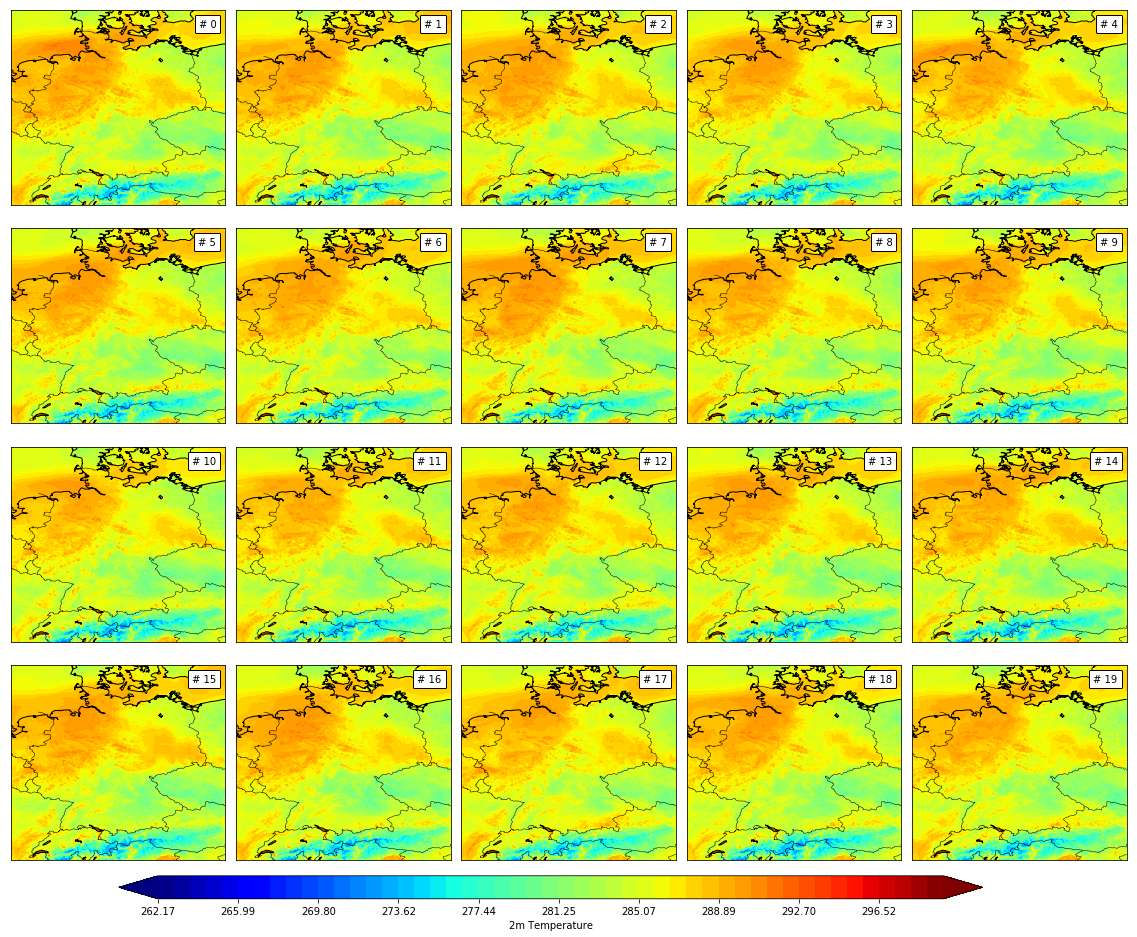

In [108]:
# Mosaico 
fig = plt.figure(figsize=(20,16))
m = Basemap(projection='cyl', llcrnrlon=5, llcrnrlat=46,\
               urcrnrlon=16, urcrnrlat=56,  resolution='i')

x, y = m(lons,lats)
for nens in range(0,t2m.shape[1]):
    ax = plt.subplot(4,5,nens+1)
    m.drawcoastlines()
    m.drawcountries()
    cs = m.contourf(x, y, t2m[0,nens,:,:], np.linspace(t2m.min(),t2m.max(),50),
                    cmap=plt.cm.jet, extend='both')
    at = AnchoredText('# %s'% nens, prop=dict(size=10), frameon=True, loc='upper right')
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.1")
    ax.add_artist(at)
    
fig.subplots_adjust(wspace=0.05, hspace=0.02)    
cax = fig.add_axes([0.2,0.1,0.6,0.02]) 
fig.colorbar(cs, cax=cax, orientation='horizontal', label='2m Temperature')

plt.savefig('mosaic_t2m.png', dpi=150, bbox_inches='tight')

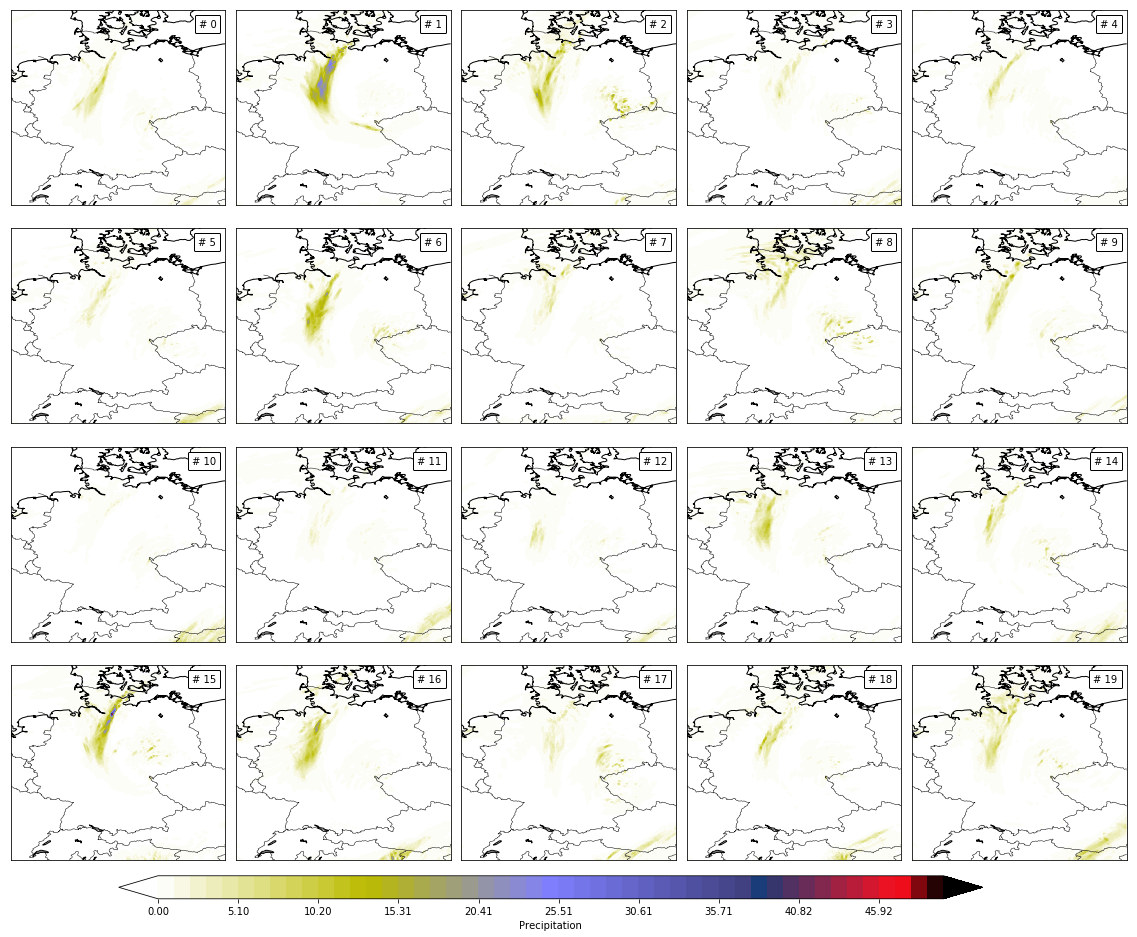

In [107]:
# Mosaico 
fig = plt.figure(figsize=(20,16))
m = Basemap(projection='cyl', llcrnrlon=5, llcrnrlat=46,\
               urcrnrlon=16, urcrnrlat=56,  resolution='i')

x, y = m(lons,lats)
for nens in range(0,t2m.shape[1]):
    ax = plt.subplot(4,5,nens+1)
    m.drawcoastlines()
    m.drawcountries()
    cs = m.contourf(x, y, tot_prec[-1,nens,:,:], np.linspace(0,50,50),
                    cmap=plt.cm.gist_stern_r, extend='both')
    at = AnchoredText('# %s'% nens, prop=dict(size=10), frameon=True, loc='upper right')
    at.patch.set_boxstyle("round,pad=0.,rounding_size=0.1")
    ax.add_artist(at)

fig.subplots_adjust(wspace=0.05, hspace=0.02)    
cax = fig.add_axes([0.2,0.1,0.6,0.02]) 
fig.colorbar(cs, cax=cax, orientation='horizontal', label='Precipitation')

plt.savefig('mosaic_tot_prec.png', dpi=150, bbox_inches='tight')

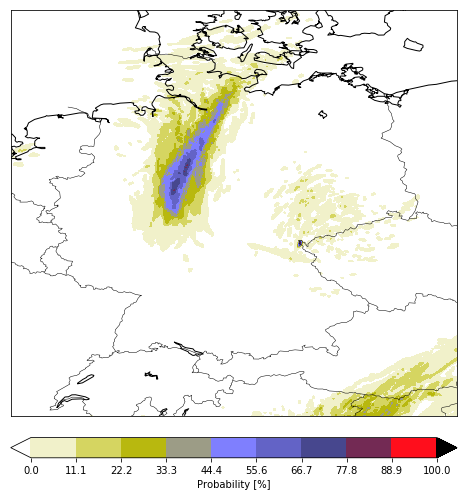

In [155]:
probabilities = (np.sum(tot_prec[:,:,:,:] > 2., axis=1)/20.)*100.

fig = plt.figure(figsize=(8,10))
m = Basemap(projection='cyl', llcrnrlon=5, llcrnrlat=46,\
               urcrnrlon=16, urcrnrlat=56,  resolution='i')
x, y = m(lons,lats)
m.drawcoastlines()
m.drawcountries()
cs = m.contourf(x, y, probabilities[-1,:,:], np.linspace(0,100,10),
                cmap=plt.cm.gist_stern_r, extend='both')

plt.colorbar(cs, orientation='horizontal', label='Probability [%]',fraction=0.046, pad=0.04)
plt.show()

In [182]:
tot_prec.shape

(28, 20, 716, 651)

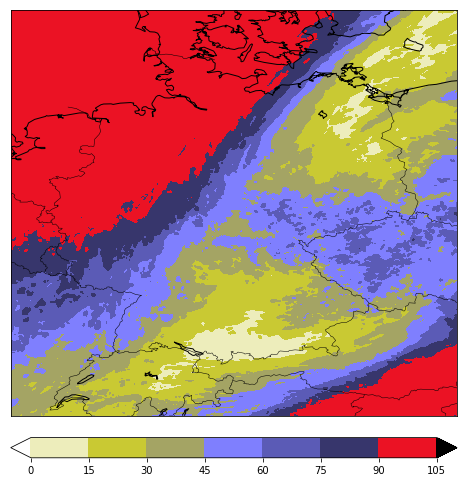

In [190]:
fig = plt.figure(figsize=(8,10))
m = Basemap(projection='cyl', llcrnrlon=5, llcrnrlat=46,\
               urcrnrlon=16, urcrnrlat=56,  resolution='i')
x, y = m(lons,lats)
m.drawcoastlines()
m.drawcountries()
cs = m.contourf(x, y, clct[-1,:,:,:].mean(axis=0),
                cmap=plt.cm.gist_stern_r, extend='both')

plt.colorbar(cs, orientation='horizontal',fraction=0.046, pad=0.04)
plt.show()

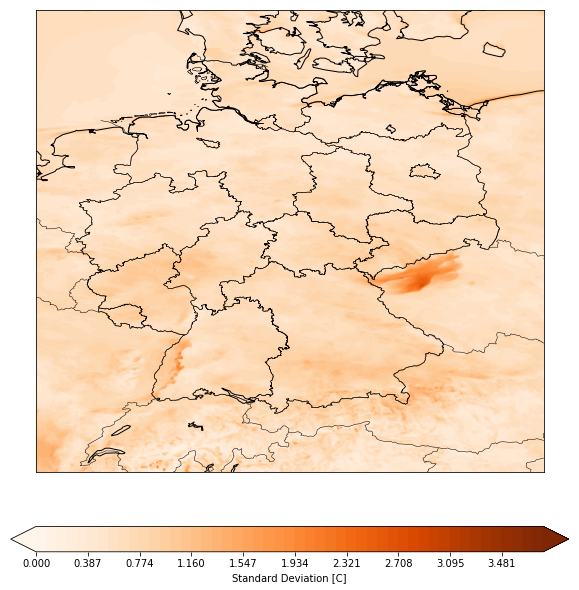

In [7]:
fig = plt.figure(figsize=(10,10))

m.drawcoastlines()
m.drawcountries()
m.readshapefile('/home/mpim/m300382/shapefiles/DEU_adm_shp/DEU_adm1','DEU_adm1',linewidth=0.5,color='black')
cs = m.contourf(x, y, t2m.std(axis=1)[-1,:,:], np.linspace(0,t2m.std(axis=1).max(),50),
                    cmap='Oranges', extend='both')
plt.colorbar(orientation='horizontal', label='Standard Deviation [C]', pad=0.1, fraction=0.05)

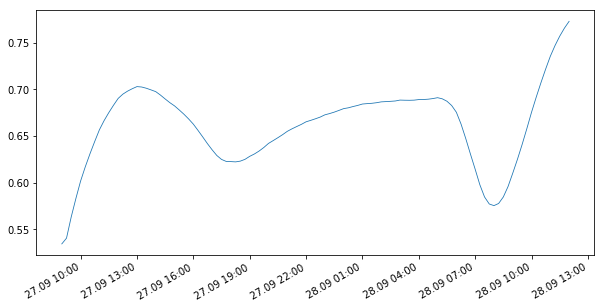

In [51]:
fig = plt.figure(figsize=(10,5))

# plt.plot_date(time, var_ens.std(axis=1).mean(axis=(1,2)), '-',linewidth=0.8)
plt.plot_date(time, var_ens.mean(axis=()), '-',linewidth=0.8)

fig.autofmt_xdate()
plt.gca().xaxis.set_major_formatter(DateFormatter('%d.%m %H:%M'))
plt.show()

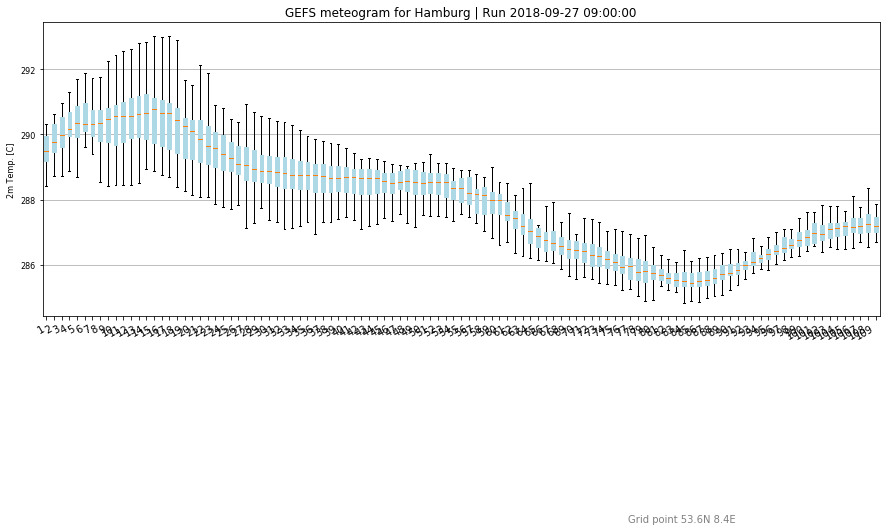

<Figure size 432x288 with 0 Axes>

In [56]:
from geopy.geocoders import Nominatim

cities = ["Hamburg"]

fig = plt.figure(figsize=(15,6))

t_2m_point={}
geolocator = Nominatim()
    
for city in cities:
    loc = geolocator.geocode(city)
    ilat, ilon=np.unravel_index(abs(lats-loc.latitude).argmin(), abs(lats-loc.latitude).shape)
    t_2m_point[city] = t2_ens[:,:,ilat,ilon]

    fig = plt.figure(1, figsize=(9,10))
    ax1=plt.gca()
    ax1.set_title("GEFS meteogram for "+city+" | Run "+str(grb.analDate))
    
    ax1.plot_date(time, np.mean(t_2m_point[city].T, axis=0), '-' , linewidth=2, color='red')
    ax1.set_ylabel("2m Temp. [C]",fontsize=8)
    ax1.yaxis.grid(True)
    ax1.tick_params(axis='y', which='major', labelsize=8)
    ax1.tick_params(axis='x', which='both')
        
    bplot=ax1.boxplot(t_2m_point[city].T, patch_artist=True, showfliers=False)
    for box in bplot['boxes']:
        box.set(color='LightBlue')
        box.set(facecolor='LightBlue')

    ax1.annotate('Grid point %3.1fN %3.1fE' % (lats[ilat,ilon], lons[ilat,ilon]),
                 xy=(0.7, -0.7), xycoords='axes fraction', color="gray")

    fig.autofmt_xdate()
#     plt.savefig(diri_images+"meteogram_"+city_to_plot, dpi=150)
    plt.show()
    plt.clf()

In [ ]:
# Plots the probability of snow vs. rain
import numpy as np
# import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
from reader import *
from config import *
import pandas as pd

In [2]:
# Read variables from files and time, this is common to all the script
ds = read_variable_xr(variable='prs_gsp')
ds1 = read_variable_xr(variable='tot_prec')

lats, lons = ds.latitude.data, ds.longitude.data
time= pd.to_datetime(ds.valid_time.data)
cum_hour=np.array((time-time[0]) / pd.Timedelta('1 hour')).astype("int")

snow = ds.lssrwe*3600.

# We have to load the array into memory since there are problems with the indexing in Dask...
tot_prec = ds1['tp'].load()*0.
for i in range(1, len(time)):
    tot_prec[i,:,:,:] = ds1.tp[i,:,:,:]-ds1.tp[i-1,:,:,:]
tot_prec_mean = tot_prec.mean(axis=1)

threshold = 0.01 # this should be in mm/h of equivalent snow height

In [16]:
ds1.tp

<xarray.DataArray 'tp' (time: 28, number: 20, y: 716, x: 651)>
array([[[[0.000000e+00, ..., 5.180359e-03],
         ...,
         [0.000000e+00, ..., 0.000000e+00]],

        ...,

        [[9.479523e-04, ..., 4.272461e-04],
         ...,
         [0.000000e+00, ..., 6.103516e-05]]],


       ...,


       [[[2.480469e-01, ..., 1.219727e+00],
         ...,
         [3.974609e-01, ..., 0.000000e+00]],

        ...,

        [[1.052734e+00, ..., 1.796875e-01],
         ...,
         [0.000000e+00, ..., 9.765625e-04]]]], dtype=float32)
Coordinates:
  * number      (number) int64 1 2 3 4 5 6 7 8 9 ... 12 13 14 15 16 17 18 19 20
    surface     int64 0
    latitude    (y, x) float64 43.19 43.19 43.19 43.19 ... 57.63 57.63 57.62
    longitude   (y, x) float64 -0.2494 -0.2224 -0.1954 ... 20.14 20.17 20.21
  * time        (time) datetime64[ns] 2019-01-23T12:00:00 ... 2019-01-23T12:00:00
    step        (time) timedelta64[ns] 00:00:00 01:00:00 ... 1 days 03:00:00
    valid_time  (time) datetime

http://server.arcgisonline.com/ArcGIS/rest/services/World_Shaded_Relief/MapServer/export?bbox=5.0,46.0,16.0,56.0&bboxSR=4326&imageSR=4326&size=1000,909&dpi=96&format=png32&transparent=true&f=image


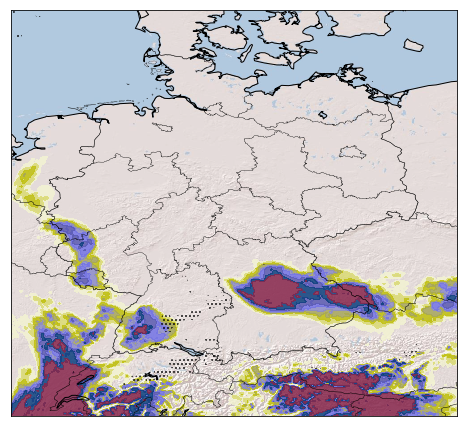

In [19]:
fig = plt.figure(figsize=(8,10))
m = get_projection("germany", regions=True)
x, y = m(lons,lats)

# Truncate colormap
cmap = plt.get_cmap('gist_stern_r')
new_cmap = truncate_colormap(cmap, 0, 0.9)

probabilities = (np.sum(snow > threshold, axis=1)/20.)*100.

cs = m.contourf(x, y, probabilities[2,:,:], np.linspace(10,100,10),
                 cmap=new_cmap, alpha=0.85)
cr = m.contourf(x, y, tot_prec_mean[i,:,:], levels=(0.1, 1.),
                colors='none', hatches=['...','...'], extend='max')

# plt.title('Probability snowfall | '+date.strftime('%d %b %Y at %H UTC'))
# annotation_run(plt.gca(), time)
# annotation(plt.gca(), text='COSMO-D2-EPS', loc='upper left')
# plt.colorbar(cs, orientation='horizontal', label='Probability [%]',fraction=0.04, pad=0.04)
plt.show()